<a href="https://colab.research.google.com/github/lmedinelli/UAIAI/blob/master/mod2_heuristics/Tarea2_Constrain_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Adolfo Ibañez](https://www.uai.cl/assets/themes/uai-central/img/logo.svg)

---

# UAI : Magister / Diploma AI 2020

---

## Mini-proyecto 2 - Programación Basada en Restricciones

### Descripción Problema a resolver

La evaluación consiste en realizar un modelo
que resuelva el problema de asignar trabajadores
a vuelos en una compañía aérea. Para lo que tenemos los siguientes datos:

1. Hay 20 trabajadores
+ Azafatos: Tom, David, Jeremy, Ron, Joe, Bill, Fred, Bob,
Mario, Ed
+ Azafatas: Carol, Janet, Tracy, Marilyn, Carolyn, Cathy,
Inez, Jean, Heather, Juliet
2. Hay 10 vuelos (la numeración es importante)
3. Cada vuelo necesita el siguiente número de
trabajadores, azafatos y azafatas.

![](https://drive.google.com/uc?export=view&id=1cHJBX0X42Auo0EwdRfY_xUByM_V71m9K)

4. Además, cada vuelo necesita al menos una persona
que sepa francés, una persona que sepa español y
una persona que sepa alemán.
* Saben francés: Inez, Bill, Jean, Juliet
* Saben español: Tom, Jeremy, Mario, Cathy, Juliet
* Saben alemán: Bill, Fred, Joe, Mario, Marilyn, Inez, Heather

5. Si un trabajador trabaja un vuelo, no puede
trabajar ninguno de los siguientes dos vuelos
(ejemplo, si Mario trabaja en el vuelo 1, no
puede trabajar en el vuelo 2 ni en el vuelo 3).

---

### Descripción **Objetivo**

* El objetivo es encontrar una asignación de
trabajadores a vuelos.

* Pregunta extra: ¿Se podría hacer con menos
trabajadores?

# Solución

La solución que se empleará es utilizando ortools disponibles en Google Collab y mediante dicha herramienta genera un "solver" basado en restricciones donde agregaremos primero los atributos de las personas y sus caracteristicas disponibles, luego en un diccionario Tripulación que contiene una tupla como llave que corresponde al vuelo y a la persona involucrada en el vuelo, agregado al solver como in entero es con lo que resolveremos nuestro problema.

Generaremos en forma programatica los resultados del encabezado y podemos resolver el objectivo requerido, incluso respondiendo si se puede hacer con menos trabajadores al ajustar nuestro solver con parámetros que corresponden a encontrar la minima asignación, con esto sabemos que nuestra primera solución contendrá el menor espacio posible de solución dadas las restricciones impuestas al Solver.

## Importación de paquetes y creación de variables

In [1]:
pip install ortools

     |████████████████████████████████| 29.5MB 130kB/s 


In [25]:
from ortools.constraint_solver import pywrapcp
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np

In [ ]:
#help(pywrapcp)

In [4]:
solver = pywrapcp.Solver("Tripulacion")

In [5]:
 nombres = [
      "Tom", "David", "Jeremy", "Ron", "Joe", "Bill", "Fred", "Bob", "Mario",
      "Ed", "Carol", "Janet", "Tracy", "Marilyn", "Carolyn", "Cathy", "Inez",
      "Jean", "Heather", "Juliet"
  ]

In [6]:
print(nombres)

['Tom', 'David', 'Jeremy', 'Ron', 'Joe', 'Bill', 'Fred', 'Bob', 'Mario', 'Ed', 'Carol', 'Janet', 'Tracy', 'Marilyn', 'Carolyn', 'Cathy', 'Inez', 'Jean', 'Heather', 'Juliet']


In [8]:
personas = len(nombres)

Se establece la matriz de atributos que corresponden a toda la tripulación, de modo de poder clasificar y clusterizar los ambitos que tenemos de trabajo de la tripulación.

In [9]:
atributos = [
      #  Azafatos, Azafatas, Frances, Español, Aleman
      [1, 0, 0, 1, 0],  # Tom     = 1
      [1, 0, 0, 0, 0],  # David   = 2
      [1, 0, 0, 1, 0],  # Jeremy  = 3
      [1, 0, 0, 0, 0],  # Ron     = 4
      [1, 0, 0, 0, 1],  # Joe     = 5
      [1, 0, 1, 0, 1],  # Bill    = 6
      [1, 0, 0, 0, 1],  # Fred    = 7
      [1, 0, 0, 0, 0],  # Bob     = 8
      [1, 0, 0, 1, 1],  # Mario   = 9
      [1, 0, 0, 0, 0],  # Ed      = 10
      [0, 1, 0, 0, 0],  # Carol   = 11
      [0, 1, 0, 0, 0],  # Janet   = 12
      [0, 1, 0, 0, 0],  # Tracy   = 13
      [0, 1, 0, 1, 1],  # Marilyn = 14
      [0, 1, 0, 0, 0],  # Carolyn = 15
      [0, 1, 0, 1, 0],  # Cathy   = 16
      [0, 1, 1, 0, 1],  # Inez    = 17
      [0, 1, 1, 0, 0],  # Jean    = 18
      [0, 1, 0, 0, 1],  # Heather = 19
      [0, 1, 1, 1, 0]  # Juliet  = 20
  ]

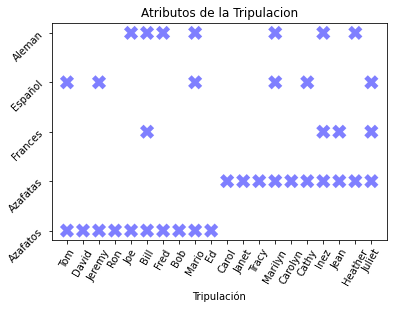

In [28]:

i=0
l=1
for nombre in nombres:
    l=1
    for atributo in atributos[i]:
        if(atributo==1):
            plt.scatter(nombre,l,c='blue',alpha=0.5,edgecolors='none',s=200, marker="X")
        l=l+1
    i=i+1
plt.xticks(rotation=60)
plt.title('Atributos de la Tripulacion')
plt.yticks([1, 2, 3, 4, 5], [ 'Azafatos', 'Azafatas', 'Frances', 'Español', 'Aleman'],rotation=45)
plt.xlabel("Tripulación")
plt.show()

Se forma la siguiente tabla requerida por las condiciones del problema generado correspondiente a la tripulación requerida por fila (cada fila es un vuelo de la tabla del encabezado):

  + Numero Trabajadores     : Numero total de trabajadores requeridos en vuelo
  + Azafatos  : Azafatos requeridos
  + Azafatas : Azafatas requeridas
  + Frances    : Cuantos requeridos que sepan frances
  + Español   : Cuantos que sepan español son requeridos
  + Aleman    : Cuantos que sepan Aleman son requeridos

In [14]:

tripulacion_requerida = [
                         [4, 1, 1, 1, 1, 1],  # Vuelo 1
                         [5, 1, 1, 1, 1, 1],  # Vuelo 2
                         [5, 1, 1, 1, 1, 1],  # Vuelo 3
                         [6, 2, 2, 1, 1, 1],  # Vuelo 4
                         [7, 3, 3, 1, 1, 1],  # Vuelo 5
                         [4, 1, 1, 1, 1, 1],  # Vuelo 6
                         [5, 1, 1, 1, 1, 1],  # Vuelo 7
                         [6, 1, 1, 1, 1, 1],  # Vuelo 8
                         [6, 2, 2, 1, 1, 1],  # Vuelo 9
                         [7, 3, 3, 1, 1, 1]   # Vuelo 10
                         ]

numero_vuelos = len(tripulacion_requerida)  # numero de vuelos

10

Exigencias de requerimentos en forma visual por vuelo en 'Bubble', de modo de dimensionar los vuelos complejos.

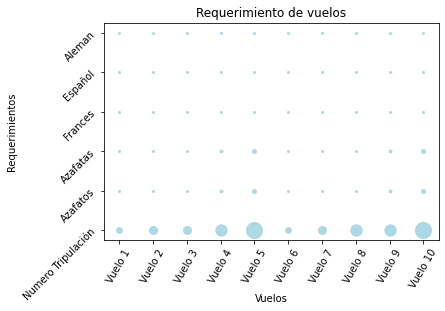

In [29]:
i=0
lista_vuelos = []                    
for vuelo in range(numero_vuelos):
    l=0
    lista_vuelos.append("Vuelo "+str(vuelo+1))
    for trip in tripulacion_requerida[i]:
        plt.scatter(lista_vuelos[vuelo],l+1,c='lightblue',s=2*(2**trip))
        l=l+1
    i=i+1
plt.xticks(rotation=60)
plt.title('Requerimiento de vuelos')
plt.yticks([1, 2, 3, 4, 5,6], [ 'Numero Tripulación','Azafatos', 'Azafatas', 'Frances', 'Español', 'Aleman'],rotation=45)
plt.xlabel("Vuelos")
plt.ylabel("Requerimientos")
plt.show()

Se genera un diccionario de tripulación con llave una tupla que tiene el valor del vuelo en el primer elemento y de la cantidad de tripulacióón en el segundo y el elemnto valor corresponde a un solver que puede ser 0 o 1.

Tambien se crea una variable numero de trabajadores que contieen un solver que corresponde a una variable entera que puede ir desde 1 a numero de personas, llamada num_trab

In [16]:
tripulacion = {}
for i in range(numero_vuelos):
  for j in range(personas):
    # tripulacion es un diccionario que las llaves son una tupla entre el numero de vuelos
    # y valor es un solver que tiene una varible entera que va de 0 a 1, por lo que indicara si esa persona 
    # de la tripulación pertenece al vuelo ej. si llave es (0,17) y el valor es 1, implica que en vuelo 1 va Jean
    tripulacion[(i, j)] = solver.IntVar(0, 1, "tripulacion[%i,%i]" % (i, j)) 

tripulacion_f = [ tripulacion[(i, j)] for i in range(numero_vuelos) for j in range(personas)]

  # numero de personas trabajando
num_trab = solver.IntVar(1, personas, "num_trab")

In [17]:
num_trab

num_trab(1..20)

## Creación de restricciones

In [18]:
# numero de personas trabajando usando linked lists
solver.Add(num_trab == solver.Sum([
      solver.IsGreaterOrEqualCstVar( solver.Sum([tripulacion[(f, p)] for f in range(numero_vuelos)]), 1) for p in range(personas)
  ]))


In [19]:
 for f in range(numero_vuelos):
    # tamaño de la tripulacion ej [4, 1, 1, 1, 1, 1],  # Vuelo 1, donde son 4
    tmp = [tripulacion[(f, i)] for i in range(personas)]
    #print(tmp)
    solver.Add(solver.Sum(tmp) == tripulacion_requerida[f][0])
    # atributos y requerimientos
    for j in range(5): # 4 columnas de atributos requeridos
      # el producto entre los atributos de una caracteristica especifica (ej frances) por la tripulacion 
      # de un vuelo f  
      tmp = [atributos[i][j] * tripulacion[(f, i)] for i in range(personas)]
      solver.Add(solver.Sum(tmp) >= tripulacion_requerida[f][j + 1])

In [20]:
 # restriccion de descanso en vuelos (no se puede trabajar en los dos vuelos siguientes)
 for f in range(numero_vuelos - 2):
   for i in range(personas):
     solver.Add(tripulacion[f, i] + tripulacion[f + 1, i] + tripulacion[f + 2, i] <= 1)

In [21]:
  # extra : todos deben trabajar en al menos dos de los vuelos
  # for i in range(personas):
  #     [solver.Add(solver.Sum([tripulacion[f,i] for f in range(num_vuelos)]) >= 2) ]

# Solución y Búsqueda

In [22]:
solucion = solver.Assignment()
solucion.Add(tripulacion_f)
solucion.Add(num_trab)

# Revisar parametros del solver de assignacióón para determinar reducción de personas
db = solver.Phase(tripulacion_f, solver.CHOOSE_MIN_SIZE,
                    solver.ASSIGN_MIN_VALUE)

# Resultados

Solucion #1
Vuelos:
Vuelo 0 personas: Ed Jean Heather Juliet 
Vuelo 1 personas: Mario Marilyn Carolyn Cathy Inez 
Vuelo 2 personas: Jeremy Bill Carol Janet Tracy 
Vuelo 3 personas: Fred Bob Ed Jean Heather Juliet 
Vuelo 4 personas: Ron Joe Mario Marilyn Carolyn Cathy Inez 
Vuelo 5 personas: Jeremy Bill Janet Tracy 
Vuelo 6 personas: Ed Carol Jean Heather Juliet 
Vuelo 7 personas: Bob Mario Marilyn Carolyn Cathy Inez 
Vuelo 8 personas: Jeremy Joe Bill Fred Janet Tracy 
Vuelo 9 personas: David Ron Ed Carol Jean Heather Juliet 

Tripulacion:
Tom        Vuelos 
David      Vuelos 9 
Jeremy     Vuelos 2 5 8 
Ron        Vuelos 4 9 
Joe        Vuelos 4 8 
Bill       Vuelos 2 5 8 
Fred       Vuelos 3 8 
Bob        Vuelos 3 7 
Mario      Vuelos 1 4 7 
Ed         Vuelos 0 3 6 9 
Carol      Vuelos 2 6 9 
Janet      Vuelos 2 5 8 
Tracy      Vuelos 2 5 8 
Marilyn    Vuelos 1 4 7 
Carolyn    Vuelos 1 4 7 
Cathy      Vuelos 1 4 7 
Inez       Vuelos 1 4 7 
Jean       Vuelos 0 3 6 9 
Heather    Vuelos 0

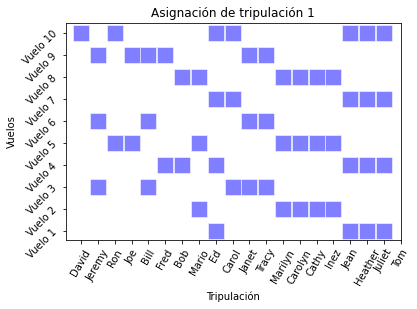

Solucion #2
Vuelos:
Vuelo 0 personas: Ed Jean Heather Juliet 
Vuelo 1 personas: Mario Marilyn Carolyn Cathy Inez 
Vuelo 2 personas: Jeremy Bill Carol Janet Tracy 
Vuelo 3 personas: Fred Bob Ed Jean Heather Juliet 
Vuelo 4 personas: Ron Joe Mario Marilyn Carolyn Cathy Inez 
Vuelo 5 personas: Jeremy Bill Janet Tracy 
Vuelo 6 personas: Ed Carol Jean Heather Juliet 
Vuelo 7 personas: Bob Mario Marilyn Carolyn Cathy Inez 
Vuelo 8 personas: Jeremy Joe Bill Fred Janet Tracy 
Vuelo 9 personas: Tom Ron Ed Carol Jean Heather Juliet 

Tripulacion:
Tom        Vuelos 9 
David      Vuelos 
Jeremy     Vuelos 2 5 8 
Ron        Vuelos 4 9 
Joe        Vuelos 4 8 
Bill       Vuelos 2 5 8 
Fred       Vuelos 3 8 
Bob        Vuelos 3 7 
Mario      Vuelos 1 4 7 
Ed         Vuelos 0 3 6 9 
Carol      Vuelos 2 6 9 
Janet      Vuelos 2 5 8 
Tracy      Vuelos 2 5 8 
Marilyn    Vuelos 1 4 7 
Carolyn    Vuelos 1 4 7 
Cathy      Vuelos 1 4 7 
Inez       Vuelos 1 4 7 
Jean       Vuelos 0 3 6 9 
Heather    Vuelos 0 3

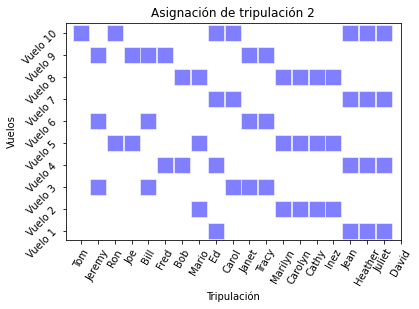

Solucion #3
Vuelos:
Vuelo 0 personas: Ed Jean Heather Juliet 
Vuelo 1 personas: Mario Marilyn Carolyn Cathy Inez 
Vuelo 2 personas: Jeremy Bill Carol Janet Tracy 
Vuelo 3 personas: Fred Bob Ed Jean Heather Juliet 
Vuelo 4 personas: Ron Joe Mario Marilyn Carolyn Cathy Inez 
Vuelo 5 personas: Jeremy Bill Janet Tracy 
Vuelo 6 personas: Ed Carol Jean Heather Juliet 
Vuelo 7 personas: Bob Mario Marilyn Carolyn Cathy Inez 
Vuelo 8 personas: Jeremy Joe Bill Fred Janet Tracy 
Vuelo 9 personas: Tom David Ed Carol Jean Heather Juliet 

Tripulacion:
Tom        Vuelos 9 
David      Vuelos 9 
Jeremy     Vuelos 2 5 8 
Ron        Vuelos 4 
Joe        Vuelos 4 8 
Bill       Vuelos 2 5 8 
Fred       Vuelos 3 8 
Bob        Vuelos 3 7 
Mario      Vuelos 1 4 7 
Ed         Vuelos 0 3 6 9 
Carol      Vuelos 2 6 9 
Janet      Vuelos 2 5 8 
Tracy      Vuelos 2 5 8 
Marilyn    Vuelos 1 4 7 
Carolyn    Vuelos 1 4 7 
Cathy      Vuelos 1 4 7 
Inez       Vuelos 1 4 7 
Jean       Vuelos 0 3 6 9 
Heather    Vuelos 0

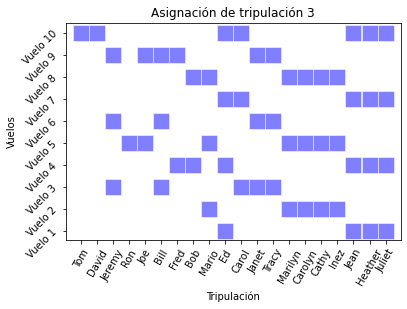

Solucion #4
Vuelos:
Vuelo 0 personas: Ed Jean Heather Juliet 
Vuelo 1 personas: Mario Marilyn Carolyn Cathy Inez 
Vuelo 2 personas: Jeremy Bill Carol Janet Tracy 
Vuelo 3 personas: Fred Bob Ed Jean Heather Juliet 
Vuelo 4 personas: Ron Joe Mario Marilyn Carolyn Cathy Inez 
Vuelo 5 personas: Jeremy Bill Janet Tracy 
Vuelo 6 personas: Ed Carol Jean Heather Juliet 
Vuelo 7 personas: Bob Mario Marilyn Carolyn Cathy Inez 
Vuelo 8 personas: Jeremy Joe Bill Fred Janet Tracy 
Vuelo 9 personas: Tom David Ron Carol Jean Heather Juliet 

Tripulacion:
Tom        Vuelos 9 
David      Vuelos 9 
Jeremy     Vuelos 2 5 8 
Ron        Vuelos 4 9 
Joe        Vuelos 4 8 
Bill       Vuelos 2 5 8 
Fred       Vuelos 3 8 
Bob        Vuelos 3 7 
Mario      Vuelos 1 4 7 
Ed         Vuelos 0 3 6 
Carol      Vuelos 2 6 9 
Janet      Vuelos 2 5 8 
Tracy      Vuelos 2 5 8 
Marilyn    Vuelos 1 4 7 
Carolyn    Vuelos 1 4 7 
Cathy      Vuelos 1 4 7 
Inez       Vuelos 1 4 7 
Jean       Vuelos 0 3 6 9 
Heather    Vuelos 

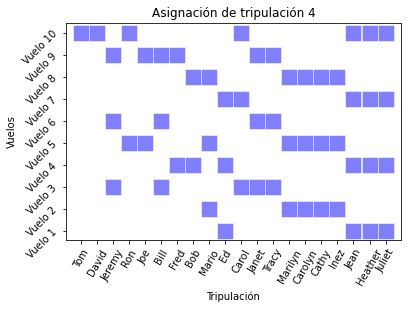

Solucion #5
Vuelos:
Vuelo 0 personas: Ed Jean Heather Juliet 
Vuelo 1 personas: Mario Marilyn Carolyn Cathy Inez 
Vuelo 2 personas: Jeremy Bill Carol Janet Tracy 
Vuelo 3 personas: Fred Bob Ed Jean Heather Juliet 
Vuelo 4 personas: Ron Joe Mario Marilyn Carolyn Cathy Inez 
Vuelo 5 personas: Jeremy Bill Janet Tracy 
Vuelo 6 personas: Ed Carol Jean Heather Juliet 
Vuelo 7 personas: Bob Mario Marilyn Carolyn Cathy Inez 
Vuelo 8 personas: Jeremy Joe Bill Fred Janet Tracy 
Vuelo 9 personas: Tom David Ron Ed Jean Heather Juliet 

Tripulacion:
Tom        Vuelos 9 
David      Vuelos 9 
Jeremy     Vuelos 2 5 8 
Ron        Vuelos 4 9 
Joe        Vuelos 4 8 
Bill       Vuelos 2 5 8 
Fred       Vuelos 3 8 
Bob        Vuelos 3 7 
Mario      Vuelos 1 4 7 
Ed         Vuelos 0 3 6 9 
Carol      Vuelos 2 6 
Janet      Vuelos 2 5 8 
Tracy      Vuelos 2 5 8 
Marilyn    Vuelos 1 4 7 
Carolyn    Vuelos 1 4 7 
Cathy      Vuelos 1 4 7 
Inez       Vuelos 1 4 7 
Jean       Vuelos 0 3 6 9 
Heather    Vuelos 0 3

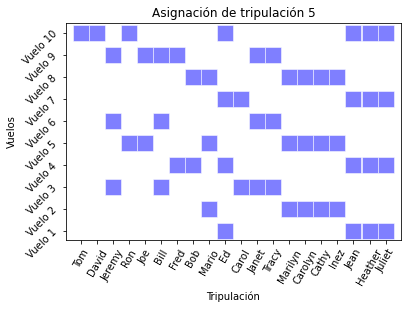


Numero Soluciones Desplegadas: 5
Fallos: 0
Ramas del solver: 181


In [32]:
debug_flag=False
sols = 5 # determine el numero de soluciones a deplegar
solver.NewSearch(db)
num_solutions = 0
while solver.NextSolution():
  num_solutions += 1
  print("Solucion #%i" % num_solutions)
  if debug_flag:
    print("Número Trabajadores:", num_trab.Value())
    for i in range(numero_vuelos):
      for j in range(personas):
        print(tripulacion[i, j].Value(), end=" ")
      print()
    print()

  print("Vuelos:")
  for flight in range(numero_vuelos):
    print("Vuelo", flight, "personas:", end=" ")
    for person in range(personas):
      if tripulacion[flight, person].Value() == 1:
        print(nombres[person], end=" ")
    print()
  print()

  print("Tripulacion:")
  for person in range(personas):
    print("%-10s Vuelos" % nombres[person], end=" ")
    for flight in range(numero_vuelos):
      if tripulacion[flight, person].Value() == 1:
        plt.scatter(nombres[person],flight,s=250,c='blue',alpha=0.5,edgecolors='white', marker="s")
        print(flight, end=" ")
    print()
  print()

  plt.xticks(nombres, rotation=60)
  plt.title('Asignación de tripulación %i'% num_solutions)
  plt.yticks(range(numero_vuelos),lista_vuelos,rotation=45)
  plt.xlabel("Tripulación")
  plt.ylabel("Vuelos")
  plt.show()

  if num_solutions >= sols:
    break
solver.EndSearch()

print()
print("Numero Soluciones Desplegadas:", num_solutions)
print("Fallos:", solver.Failures())
print("Ramas del solver:", solver.Branches())

# Conclusiones

Se obtienen distintas asignaciones posibles basadas en las restricciones preliminares pre-establecidas; podemos observar que en las dos soluciones iniciales obtenidas por el Solver tanto Tom como David no son absolutamente requeridos por ninguno de los 10 vuelos considerando sus atributos personales.

Trabajos de optimización y busqueda hoy en día son efectivamente una forma que pueden tener compañias para optimizar sus recursos disponibles y necesarios, y su aplicabilidad, con respecto a problemas de asignación puede ser desde sistemas de atención a cliente (Supermercados, call centers) hasta para la ejecución de proyectos.

# Integrantes

1. Luis Medinelli - [luis.medinelli@gmail.com](mailto:luis.medinelli@gmail.com)
2. Paula Leitao - [paulasol.leitao@gmail.com](mailto:paulasol.leitao@gmail.com)
3. Jorge Mercado - [jmercado@uc.cl](mailto:jmercado@uc.cl)